In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import warnings

plt.rcParams['figure.figsize'] = (10,6)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df2 =  df.loc[(df.Open == 1), ['Store', 'DayOfWeek', 'Sales', 'Customers']]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 4 columns):
Store        844392 non-null int64
DayOfWeek    844392 non-null int64
Sales        844392 non-null int64
Customers    844392 non-null int64
dtypes: int64(4)
memory usage: 32.2 MB


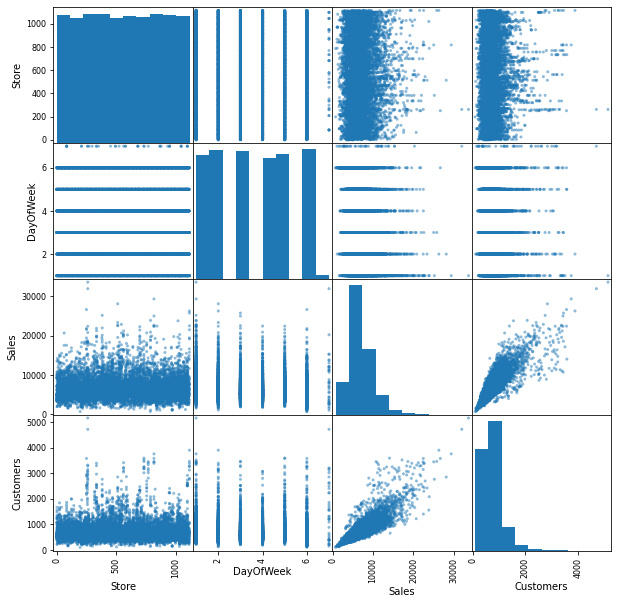

In [10]:
pd.plotting.scatter_matrix(df2.iloc[::100, :], figsize=(10,10));

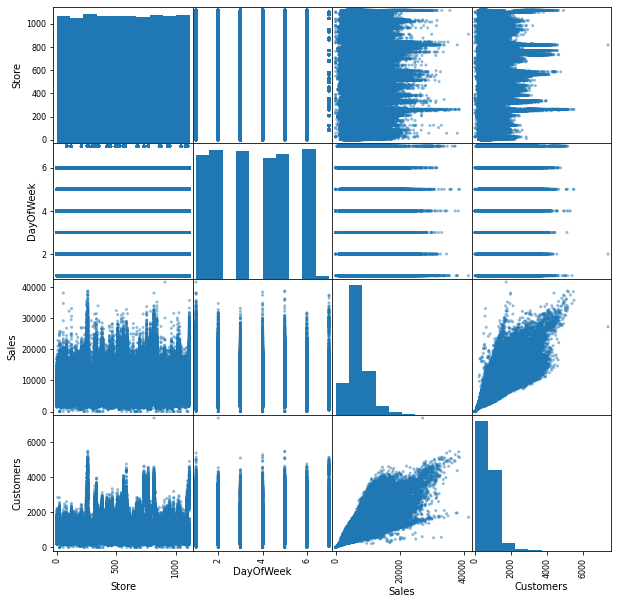

In [11]:
pd.plotting.scatter_matrix(df2, figsize=(10,10));

In [12]:
df3 = df2.groupby('DayOfWeek').agg({'Sales':['mean', 'std']})
df3

Sales             
                  mean          std
DayOfWeek                          
1          8216.073074  3691.768876
2          7088.113656  3066.237110
3          6728.122978  2781.775174
4          6767.310159  2764.548119
5          7072.677012  2764.915744
6          5874.840238  2852.730426
7          8224.723908  6235.152960

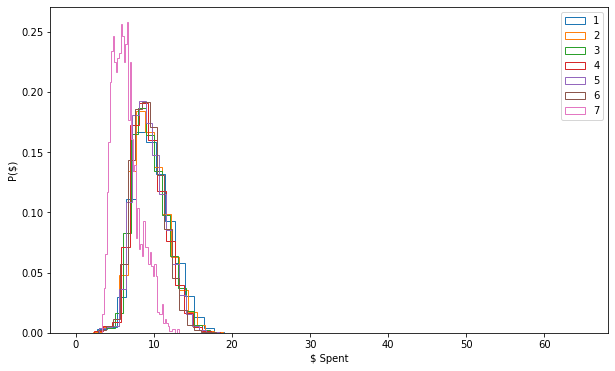

In [16]:
for day, frame in df2.groupby('DayOfWeek'):
    plt.hist(frame.Sales / frame.Customers, bins=50, histtype='step', density=True, label=day)

plt.legend()
plt.xlabel('$ Spent')
plt.ylabel('P($)');

{1: {'Spend': (9.896977492736045, 2.3848164305358375)}, 2: {'Spend': (9.594422073159746, 2.26360354244727)}, 3: {'Spend': (9.496812149001727, 2.199600748654478)}, 4: {'Spend': (9.35815236694504, 2.120318915968076)}, 5: {'Spend': (9.438294893592795, 2.1183778390610444)}, 6: {'Spend': (9.260104343618268, 1.9802523286171916)}, 7: {'Spend': (6.458912595386232, 1.7326550392889761)}}


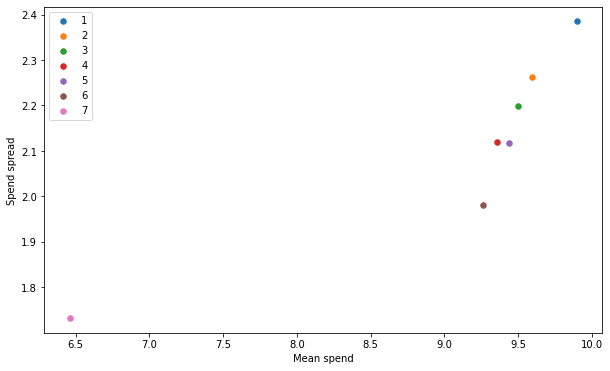

In [18]:
res = {}

for day, frame in df2.groupby('DayOfWeek'):
    data = frame.Sales / frame.Customers
    mean, std = data.mean(), data.std()
    res[day] = {'Spend': (mean, std)}
    plt.scatter([mean], [std], label=day, s=30)
    
plt.legend()
plt.xlabel('Mean spend')
plt.ylabel('Spend spread')
print(res)

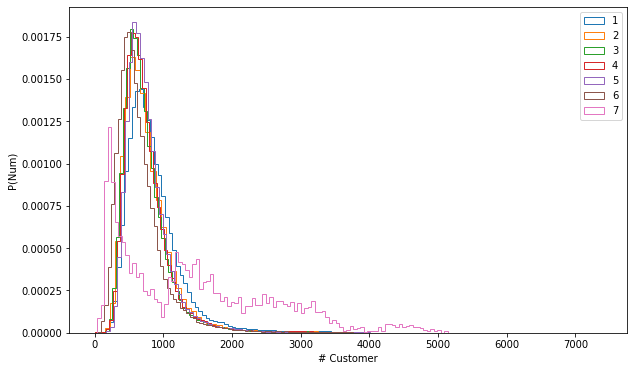

In [19]:
for day, frame in df2.groupby('DayOfWeek'):
    plt.hist(frame.Customers, bins=100, histtype='step', density=True, label=day)

plt.legend()
plt.xlabel('# Customer')
plt.ylabel('P(Num)');

1 (0.42038878818699443, -10.032692993969142, 788.8147308767948)
2 (0.42200435444496087, -8.635117127779155, 708.0591923600157)
3 (0.4058240663771445, -14.951182400678398, 691.153794854348)
4 (0.3996014591216416, -18.88871077202447, 710.0978077100474)
5 (0.3856014095983238, -9.0011023377721, 728.4210866652444)
6 (0.48161329385838514, -10.237149440491677, 593.1012008082414)
7 (0.8966735024097416, -47.63982355166327, 1057.8329147904133)


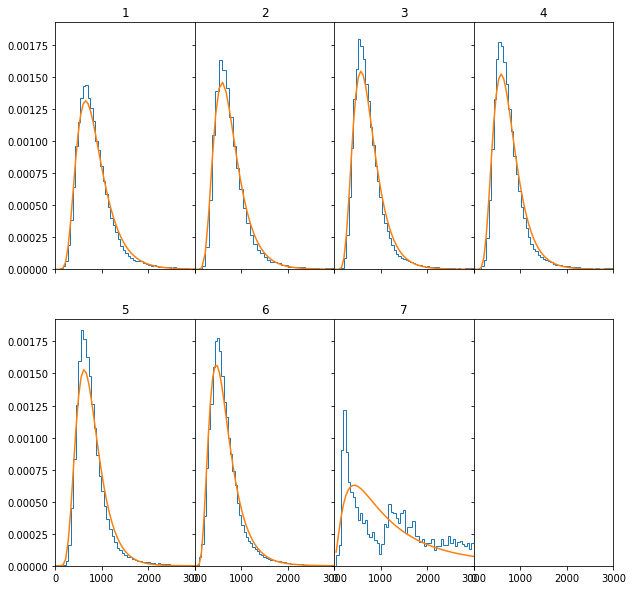

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0)

for ax, (day, frame) in zip(axes.flatten(), df2.groupby('DayOfWeek')):
    params = lognorm.fit(frame.Customers, scale=1000)
    ax.hist(frame.Customers, bins=100, density=True, histtype='step')
    xs=np.linspace(frame.Customers.min(), frame.Customers.max(), 100)
    ax.plot(xs, lognorm.pdf(xs, *params))
    ax.set_title(day)
    ax.set_xlim(0, 3000)
    res[day]['cust'] = list(params)
    print(day, params)

In [29]:
df2.groupby('DayOfWeek').agg({'Sales':['mean', 'std'], 'Customers':['mean', 'std']})

Sales                 Customers             
                  mean          std         mean          std
DayOfWeek                                                    
1          8216.073074  3691.768876   855.444984   420.044289
2          7088.113656  3066.237110   769.986753   389.827138
3          6728.122978  2781.775174   740.598876   372.526903
4          6767.310159  2764.548119   755.569784   379.039732
5          7072.677012  2764.915744   781.771639   383.004679
6          5874.840238  2852.730426   660.177526   386.119953
7          8224.723908  6235.152960  1441.532424  1112.072994

In [34]:
res

{1: {'Spend': (9.896977492736045, 2.3848164305358375),
  'cust': [0.42038878818699443, -10.032692993969142, 788.8147308767948]},
 2: {'Spend': (9.594422073159746, 2.26360354244727),
  'cust': [0.42200435444496087, -8.635117127779155, 708.0591923600157]},
 3: {'Spend': (9.496812149001727, 2.199600748654478),
  'cust': [0.4058240663771445, -14.951182400678398, 691.153794854348]},
 4: {'Spend': (9.35815236694504, 2.120318915968076),
  'cust': [0.3996014591216416, -18.88871077202447, 710.0978077100474]},
 5: {'Spend': (9.438294893592795, 2.1183778390610444),
  'cust': [0.3856014095983238, -9.0011023377721, 728.4210866652444]},
 6: {'Spend': (9.260104343618268, 1.9802523286171916),
  'cust': [0.48161329385838514, -10.237149440491677, 593.1012008082414]},
 7: {'Spend': (6.458912595386232, 1.7326550392889761),
  'cust': [0.8966735024097416, -47.63982355166327, 1057.8329147904133]}}

In [41]:
percentiles = 100 * norm.cdf([-1, 0, 1])
n = 100000

for day, dic in res.items():
    spend = norm(*dic['Spend']).rvs(n)      # *dic['Spend'] contians the required arguments of norm() which is mean, std
    custs = lognorm(*dic['cust']).rvs(n)    # similarly here *dic['cust'] contains shape, mean, std
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f'Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})')    

Day 1 has profit 7524.60(+4719.89)(-2994.68)
Day 2 has profit 6572.19(+4091.86)(-2600.14)
Day 3 has profit 6274.32(+3811.70)(-2436.88)
Day 4 has profit 6337.61(+3744.48)(-2452.17)
Day 5 has profit 6676.67(+3720.54)(-2490.42)
Day 6 has profit 5283.41(+3716.07)(-2223.91)
Day 7 has profit 6279.11(+10276.77)(-4002.62)


In [42]:
for day, dic in res.items():
    mean_spend = dic['Spend'][0]
    num_cust = dic['cust'][2]
    
    spend = norm(mean_spend, mean_spend * 25).rvs(n)
    custs = lognorm(0.4, 0, num_cust).rvs(n)
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f'Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})')    

Day 1 has profit 7624.71(+198851.47)(-194074.17)
Day 2 has profit 5861.26(+173565.54)(-169263.75)
Day 3 has profit 5683.61(+166403.10)(-163757.88)
Day 4 has profit 5753.03(+169372.81)(-165829.55)
Day 5 has profit 6251.21(+175845.14)(-171668.39)
Day 6 has profit 5446.02(+139181.67)(-138287.64)
Day 7 has profit 6618.88(+173473.08)(-170973.51)


In [43]:
for day, dic in res.items():
    mean_spend = dic['Spend'][0]
    num_cust = dic['cust'][2]
    
    spend = norm(mean_spend + 1, mean_spend * 25 * 1.5).rvs(n)
    custs = lognorm(0.4, 0, num_cust).rvs(n)
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f'Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})')    

Day 1 has profit 8409.76(+298042.54)(-295727.51)
Day 2 has profit 8428.06(+255201.33)(-256810.18)
Day 3 has profit 7945.81(+248452.92)(-247522.90)
Day 4 has profit 7568.44(+251257.19)(-253505.59)
Day 5 has profit 5174.72(+262324.05)(-259195.14)
Day 6 has profit 5336.35(+208941.86)(-207150.88)
Day 7 has profit 8011.81(+259516.24)(-256423.27)
